In [1]:
import functools
import random
import tqdm

lines = open('inputs/day05.txt').read()
seeds, *maps = lines.split('\n\n')

map_ranges = dict()
titles = list()

for map_txt in maps: 
    title, *rows = map_txt.split("\n")
    titles.append(title)
    map_ranges[title] = list()
    for row in rows: 
        row = [int(x) for x in row.split(' ') if x]
        dest_range_start, source_range_start, range_length = row
        map_ranges[title].append(row)

@functools.cache        
def get_output_for_seed(seed): 
    cur_num = seed
    for title in titles: 
        for map_range in map_ranges[title]: 
            dest_range_start, source_range_start, range_length = map_range
            if cur_num in range(source_range_start, source_range_start + range_length): 
                cur_num = cur_num - (source_range_start - dest_range_start)
                break
    return cur_num

_, *seeds = seeds.split(' ')
results = list()
for cur_num in seeds: 
    cur_num = int(cur_num)
    cur_num = get_output_for_seed(cur_num)
    results.append(cur_num)

print("part 1", min(results))

part 1 650599855


In [3]:
ranges = list()
num_initial_seeds = 5_000

all_trials = list() # (result, input)
for i in range(0, len(seeds), 2): 
    start = int(seeds[i])
    rangelen = int(seeds[i+1])
    
    ranges.append(range(start, start+rangelen))    

    totry = random.sample(ranges[-1], k=min(len(ranges[-1]), num_initial_seeds))

    for try_seed in totry: 
        all_trials.append((get_output_for_seed(try_seed), try_seed))


for random_scatter in [10_000, 1_000, 512, 256, 128, 64, 32, 8, 3]: 
    all_trials = list(set(all_trials))
    all_trials.sort()
    all_trials = all_trials[:10_000]

    new_trials = list()
    for output, seed in tqdm.tqdm(all_trials): 
        for _ in range(min(random_scatter, 100)): 
            new_seed = seed + random.randint(-1*random_scatter, random_scatter)

            found = False
            for r in ranges: 
                if new_seed in r: 
                    found = True
            if not found: 
                continue
            
            new_trials.append((get_output_for_seed(new_seed), new_seed) )
    all_trials = new_trials
    all_trials.sort()
print('part 2', all_trials[0][0])        


 24%|██▍       | 2439/10000 [00:00<00:01, 4238.59it/s]

In [10]:
import tqdm

lines = open('inputs/day05.txt').read()
seeds, *maps = lines.split('\n\n')

map_ranges = dict()
titles = list()

for map_txt in maps: 
    title, *rows = map_txt.split("\n")
    titles.append(title)
    map_ranges[title] = list()
    for row in rows: 
        row = [int(x) for x in row.split(' ') if x]
        # print(row)
        dest_range_start, source_range_start, range_length = row
        map_ranges[title].append(row)





_, *seeds = seeds.split(' ')
results = list()
aa = dict()
for i in range(0, len(seeds), 2): 
    start = int(seeds[i])
    end = int(seeds[i+1])
    print(start, end)
    for cur_num in tqdm.tqdm(range(start, start + end)): 
        startnum = cur_num
        # print('starting now with ', cur_num)
        cur_num = int(cur_num)
        for title in titles: 
            in_range = False
            for map_range in map_ranges[title]: 
                # print(range)
                dest_range_start, source_range_start, range_length = map_range
                if cur_num in range(source_range_start, source_range_start + range_length): 
                    # print('found', cur_num - (source_range_start - dest_range_start), 'becauce of rule', dest_range_start, source_range_start, range_length)
                    cur_num = cur_num - (source_range_start - dest_range_start)
                    in_range = True
                    break
            # if not in_range:
                # print("Not found", cur_num)
        # print('result', cur_num)
        results.append(cur_num)
        aa[startnum] = cur_num
    # break


79 14


100%|██████████| 14/14 [00:00<00:00, 69656.29it/s]


55 13


100%|██████████| 13/13 [00:00<00:00, 46924.23it/s]


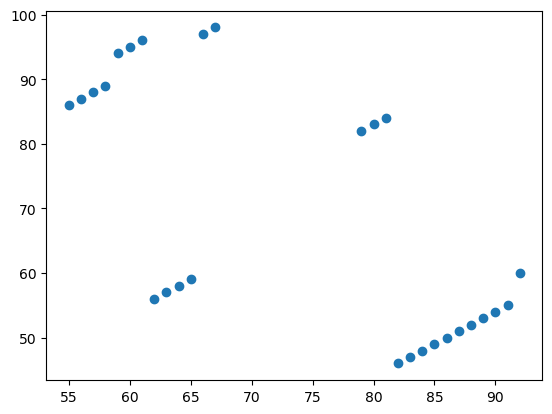

In [14]:
import matplotlib.pyplot as plt
plt.scatter([x for x in aa], [aa[x] for x in aa])

In [3]:
# Pick random seeds and keep following to the minimum

432563865 39236501
1476854973 326201032
1004521373 221995697
2457503679 46909145
603710475 11439698
1242281714 12935671
2569215463 456738587
3859706369 129955069
3210146725 618372750
601583464 1413192
